In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import *

from CustomAlgorithm import *
from TriggerInfo import *
from utils import *

drive = "/media/mateusz/Seagate Expansion Drive/all"

initted = False

df = pd.read_csv("./out.csv")

# if not initted:
#     df = pd.read_csv("./out.csv")
#     df.sort_values(["count"], inplace=True, ascending=False)

#     for index, row in df.iterrows():
#         p = PurePath(row['file'])
#         p = Path(*p.parts[5:])
#         p = drive / p
#         df.at[index, 'file'] = str(p)
#     initted = True


def region_props(trigger):
    frames = trigger.section_cutout()
    frames = combine_frames(frames)[0]
    props = skimage.measure.regionprops(frames)
    return props

In [65]:

t = TriggerInfo.from_csv_row(df.iloc[5])
rp = region_props(t)

In [66]:
rp[0].centroid

(8.0, 17.0, 1.0)

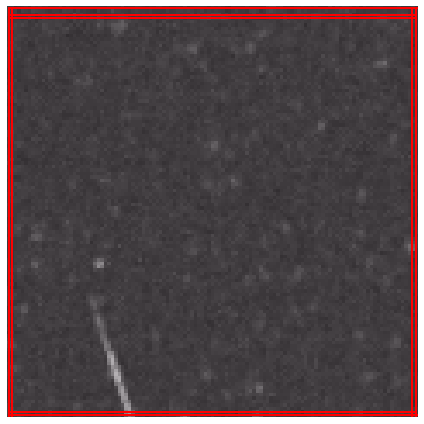

In [67]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(combine_frames(t.section_cutout())[0])

for region in rp:
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, _, maxr, maxc, _ = region.bbox
        rect = mpatches.Rectangle((minc, minr),
                                  maxc - minc,
                                  maxr - minr,
                                  fill=False,
                                  edgecolor='red',
                                  linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

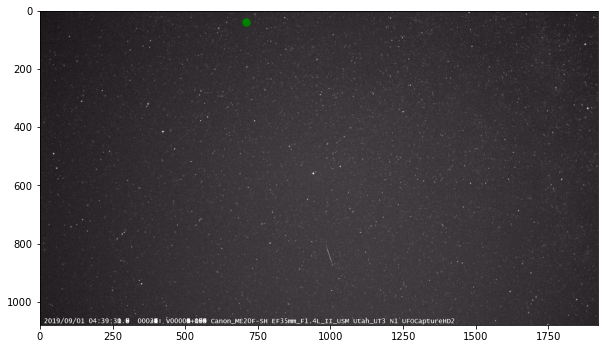

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))
img = combine_frames(get_frames(t.filename, t.start_frame, t.end_frame))
# img = combine_frames(t.section_cutout())[0]
# min_x, min_y, max_x, max_y = t.bounding_box


ax.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = img[min_y:max_y+1, min_x:max_x+1] 

rp = skimage.measure.regionprops(img)
for props in rp:

    # if props.eccentricity >0.1:
    #     continue

    y0, x0= props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)
    break

# ax.axis((0, 600, 600, 0))
plt.show()